【課程名稱】<font color=#FF0000>機器學習(Machine Learning, ML)</font><br>
【授課講師】[陳祥輝 (mail : HsiangHui.Chen@gmail.com)](mailto:HsiangHui.Chen@gmail.com)<br>
【facebook】[陳祥輝老師的臉書 (歡迎加好友)](https://goo.gl/osivhx)<br>
【相關課程】[東吳推廣數位資訊學苑陳祥輝老師的課程表](https://www.ext.scu.edu.tw/courses_search.php?key=陳祥輝)<br>

In [1]:
# -*- coding: utf-8 -*-
from platform import python_version
import os, time, glob
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【Python】{}".format(python_version()))
print("【matplotlib】{}".format(mpl.__version__))
print("【seaborn】{}".format(sns.__version__))
print("【sklearn】{}".format(sklearn.__version__))

# %autosave 120

【日期時間】2025/04/11 19:03:25
【工作目錄】E:\ml\code
【Python】3.12.4
【matplotlib】3.8.4
【seaborn】0.13.2
【sklearn】1.4.2


In [2]:
from matplotlib.font_manager import FontProperties  
winfont01 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) 
winfont02 = FontProperties(fname=r"c:\windows\fonts\kaiu.ttf", size=12) 

# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定字型為微軟正黑體
# plt.rcParams['axes.unicode_minus'] = False                # 解決負號顯示問題

# macfont = FontProperties(fname="/Library/Fonts/Arial Unicode.ttf", size=10) 

#### [ word2vac ] 
作者說要到300維度會表現得最好??<br>

他就是把很多的詞彙畫出來讓他計算 <br> 它們的關係
變異越大解釋能力越高 這兩個都是很重要的

### <font color=blue>主成份分析(Principal Component Analysis, PCA)</font>

<img src='http://180.218.162.136:2018/Images/PyML/PCA001.png' width=400 align=left></img>

<img src='http://180.218.162.136:2018/Images/PyML/PCA002.png' width=400 align=left></img>

#### 【資料來源】[Making sense of principal component analysis, eigenvectors & eigenvalues](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues) 👈<font color=red>自己點進去看那張旋轉的圖</font>


<img src='https://i.stack.imgur.com/Q7HIP.gif' width=600 align=left></img>

### <font color=red>Principal Component Analysis</font>
- Eigen Value : 解釋變異
    - 就是 pca.explained_variance_
    - 也就是每一個 PC 的變異數
    - 也就是每一個 PC 的解釋能力
- Eigen Vector : 用來轉換
    - 就是 pca.components_
    - $x_i$ 的 rotation vector
    - $x_i$ 的 loadings vector
    - 每一個 PC$_n$ 具有原 X 的成分，例如 :

<pre>
           X1              X2             X3              X4
     (Sepal.Length)  (Sepal.Width)  (Petal.Length)  (Petal.Width)
PC1 :  0.52106591     -0.26934744     0.5804131       0.56485654
PC2 :  0.37741762      0.92329566     0.02449161      0.06694199
PC3 : -0.71956635      0.24438178     0.14212637      0.63427274
PC4 : -0.26128628      0.12350962     0.80144925     -0.52359713
</pre>

PC1 就是每一個變數都有一些成分去產生的 <br>
這裡感覺PC2就是在補PC1不足的地方 <br>

#### <font color=blue>設定(預設)n_components=None，可以先整體評估每一個PCA解釋能力的比率，再用不同方式決定</font>
- 先進行標準常態，如果不進行標準常態也要去中心化
- 直接決定幾個 PC(Principal Components) : 
    - n_components : int
- 設定解釋能力的最低門檻值，來決定採用幾個 PC : 
    - n_components : float

PCA 會先去中心化 先扣除平均數 <br>
老師說她就像一個綜合果汁一樣的概念 因為他所有的東西都有 只是誰比較重要的問題 <br>

#### <font color=red>讀取資料，並且記得先去除中心點(或標準化)</font>

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
iris = pd.read_csv(r'C:\Data\PyMLData\iris.csv', sep=',', encoding='cp950', engine='python')
X = iris.values[:, :-1]
y = iris.values[:, -1]

In [5]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#### <font color=red>設定(預設)n_components=None，可以先整體評估每一個PCA解釋能力的比率，再用不同方式決定</font>
- 先進行標準化
- 直接決定幾個 PC : 
    - n_components : int
- 設定解釋能力的最低門檻值，來決定採用幾個 PC : 
    - n_components : float

In [7]:
pca = PCA(n_components=None)     # 如果是none的話表示所有都會出現
pca.fit(X_std)

PCA()

In [8]:
print(pca.explained_variance_)                               # 這個就是 eigenvalue (主成分的變異數，解釋能力)
print(pca.explained_variance_/sum(pca.explained_variance_))  # 這個就是每一個PC解釋的百分比

print("--------------------------")
print(pca.explained_variance_ratio_)                          # 這個就是每一個PC解釋的百分比
print(pca.explained_variance_ratio_.cumsum())                 # 這個就是每一個PC解釋的累進百分比

[2.93808505 0.9201649  0.14774182 0.02085386]
[0.72962445 0.22850762 0.03668922 0.00517871]
--------------------------
[0.72962445 0.22850762 0.03668922 0.00517871]
[0.72962445 0.95813207 0.99482129 1.        ]


#### [ 老師分享 ]
為什麼很多人都依定會在論文裡面用PCA這樣他的準確率不是降低了嗎???  <br> 
但其實不適 結果不一定會降低 有可能他把重要的精隨放在前面幾個變數所以也可能會提高

#### <font color=red>繪製PCA解釋百分比的累進曲線圖，決定採用幾個PC或是解釋能力的門檻值</font>

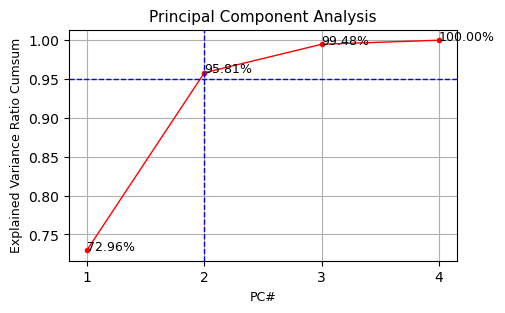

In [11]:
plt.figure(figsize=[5, 3])

plt.plot(range(1, 5), pca.explained_variance_ratio_.cumsum(),
         linestyle="-", linewidth=1, color="red", marker=".")
plt.grid(True)
plt.xlabel("PC#", fontsize=9)
plt.ylabel("Explained Variance Ratio Cumsum", fontsize=9)
plt.title("Principal Component Analysis", fontsize=11)
plt.xticks(range(1, 5))

for x_, y_ in zip(range(1, 5), pca.explained_variance_ratio_.cumsum()) :
    plt.text(x_, y_, f"{y_:.2%}", fontsize=9)

# 繪製選擇的 PC 數
plt.axvline(x=2, ymin=0, ymax=1, linestyle="--", linewidth=1, color="blue")    # 以要選擇幾個畫線
# 繪製選擇 PC 的總解釋百分比門檻值
plt.axhline(y=0.95, xmin=0, xmax=1, linestyle="--", linewidth=1, color="blue") # 以解釋率要到達多少去畫線

plt.show()

#### <font color=blue>Rotaion Matrix 與 原本 x1, x2, x3, x4 之間的關係</font>

In [13]:
print(pca.components_)              # 這個就是 eigenvector (也就是X標準化後的 Rotation Matrix)

print("\n列出每一個 PC 的 eigenvector")
for idx, eigenvector in enumerate(pca.components_, start=1) :
    print(f"PC{idx} : {eigenvector}")

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]

列出每一個 PC 的 eigenvector
PC1 : [ 0.52106591 -0.26934744  0.5804131   0.56485654]
PC2 : [0.37741762 0.92329566 0.02449161 0.06694199]
PC3 : [-0.71956635  0.24438178  0.14212637  0.63427274]
PC4 : [-0.26128628  0.12350962  0.80144925 -0.52359713]


這個就跟剛剛前面印出來的一樣惹

#### <font color=blue>依據給定的主成分個數來降維 n_components = 2 ，int</font>

In [16]:
pca = PCA(n_components=2)         # 這裡的 2 是依據前面分析選擇出來的
X_new = pca.fit_transform(X_std)

print("【轉換前 X 的 shape】")
print(X_std.shape)
print("【轉換後 X 的 shape】")
print(X_new.shape)
print("【降維後每一個 PC 的解釋能力百分比】")
print(pca.explained_variance_ratio_)
print("【降維後每一個 PC 的解釋能力百分比累進】")
print(pca.explained_variance_ratio_.cumsum())
# 然後你就可以把他們當成新的特徵丟下去了

【轉換前 X 的 shape】
(150, 4)
【轉換後 X 的 shape】
(150, 2)
【降維後每一個 PC 的解釋能力百分比】
[0.72962445 0.22850762]
【降維後每一個 PC 的解釋能力百分比累進】
[0.72962445 0.95813207]


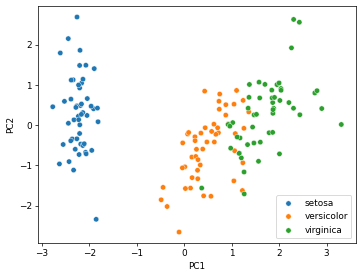

In [15]:
sns.scatterplot(x=X_new[:, 0], y=X_new[:, 1], hue=y)
fig = plt.gcf()
fig.set_dpi(64)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### <font color=blue>依據給定的主成分總解釋能力來降維 n_components = 0.97 ，float</font>

In [18]:
pca = PCA(n_components=0.97)      # 浮點數就是看解釋力 不是個數惹
X_new = pca.fit_transform(X_std)

print("【轉換前 X 的 shape】")
print(X_std.shape)
print("【轉換後 X 的 shape】")
print(X_new.shape)
print("【降維後每一個 PC 的解釋能力百分比】")
print(pca.explained_variance_ratio_)
print("【降維後每一個 PC 的解釋能力百分比累進】")
print(pca.explained_variance_ratio_.cumsum())

【轉換前 X 的 shape】
(150, 4)
【轉換後 X 的 shape】
(150, 3)
【降維後每一個 PC 的解釋能力百分比】
[0.72962445 0.22850762 0.03668922]
【降維後每一個 PC 的解釋能力百分比累進】
[0.72962445 0.95813207 0.99482129]


### <font color=blue> t分佈隨機鄰近插入(T-distributed Stochastic Neighbor Embedding, t-sne)</font>

In [19]:
from sklearn.manifold import TSNE

In [20]:
iris = pd.read_csv(r'C:\Data\PyMLData\iris.csv', sep=',', encoding='cp950', engine='python')
X = iris.values[:, :-1]
y = iris.values[:, -1]

In [21]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [24]:
tsne = TSNE(
    n_components=2,    # 降維幾維
    n_iter=1000,       # 跌代次數
)
X_new = tsne.fit_transform(X_std)
print("【降維前 X shape】")
print(X_std.shape)
print("【降維後 X shape】")
print(X_new.shape)

【降維前 X shape】
(150, 4)
【降維後 X shape】
(150, 2)


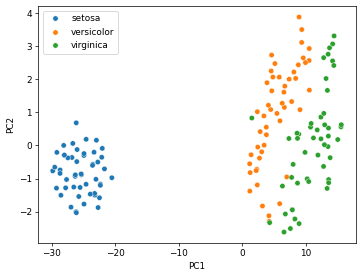

In [25]:
sns.scatterplot(x=X_new[:, 0], y=X_new[:, 1], hue=y)
fig = plt.gcf()
fig.set_dpi(64)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
# 感覺這裡分得好像比剛剛的好!!!

### [ 總結 ]
平常就可以PCA跟t-sne 都做一下 看一下哪一個會比較好 <br>
類神經網路也有一個 auto encoder 也有一個降維的套件 但她會超級九 老師很不推薦 <br>
老師比較推薦這兩個!!!

### <font color=red> 【作業2025/04/11】: 2025/04/25 23:59:00 前 繳交</font>

- 使用降維進行分類
- 比較 PCA, T-SNE 哪一個分類的效果較好(train, test 正確率較高)
- 使用 LogisticRegression
- 資料集 : churn.csv